In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta

In [2]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [3]:
df = pd.read_json('python_jobs.json').convert_dtypes()

In [4]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   title               2984 non-null   string       
 1   description         2984 non-null   string       
 2   time                2984 non-null   datetime64[s]
 3   skills              2984 non-null   object       
 4   type                2984 non-null   string       
 5   experience_level    2982 non-null   string       
 6   time_estimate       1830 non-null   string       
 7   budget              1154 non-null   Int64        
 8   proposals           2266 non-null   string       
 9   client_location     2266 non-null   string       
 10  client_jobs_posted  2256 non-null   Int64        
 11  client_hire_rate    2256 non-null   Float64      
 12  client_hourly_rate  923 non-null    Float64      
 13  client_total_spent  1439 non-null   Int64        
dtypes: Float

In [6]:
# Drop duplicated
df = df[~df.drop(['skills', 'time'], axis=1).duplicated()].reset_index(drop=True)

In [7]:
df['type'].value_counts()

type
Hourly    1821
Fixed     1144
Name: count, dtype: Int64

In [8]:
df['experience_level'].value_counts()

experience_level
Intermediate    1622
Expert          1177
Entry Level      164
Name: count, dtype: Int64

In [9]:
df['client_hourly_rate'].describe()

count        918.0
mean     22.768725
std      19.677884
min           1.75
25%           10.0
50%         16.855
75%           30.0
max         178.29
Name: client_hourly_rate, dtype: Float64

In [10]:
df['time_estimate'].value_counts()

time_estimate
Less than 1 month     709
1 to 3 months         616
More than 6 months    274
3 to 6 months         222
Name: count, dtype: Int64

In [11]:
df.loc[df['type'] == 'Fixed']['budget'].describe()

count         1144.0
mean     1151.314685
std      6803.954265
min              5.0
25%             50.0
50%            150.0
75%            500.0
max         150000.0
Name: budget, dtype: Float64

In [12]:
df.loc[df['type'] == 'Hourly']['budget'].describe()

count     0.0
mean     <NA>
std      <NA>
min      <NA>
25%      <NA>
50%      <NA>
75%      <NA>
max      <NA>
Name: budget, dtype: Float64

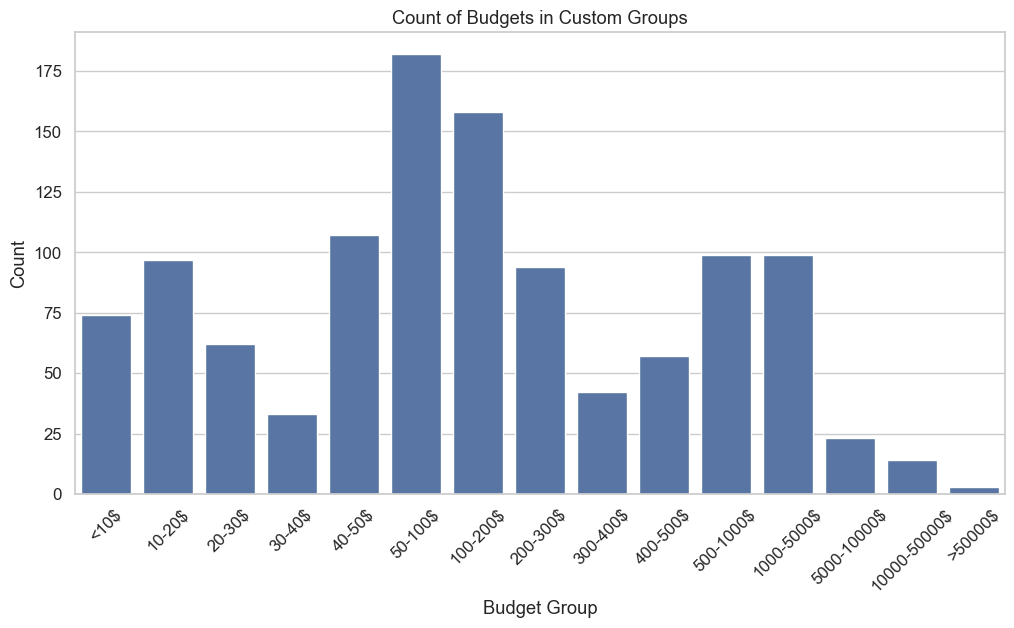

In [13]:
budget_groups = ['<10$', '10-20$', '20-30$', '30-40$', '40-50$', '50-100$', '100-200$', '200-300$', '300-400$', '400-500$', '500-1000$', '1000-5000$', '5000-10000$', "10000-50000$", ">50000$"]
budget_bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000, 50_000, float('inf')]
df['Budget_Group'] = pd.cut(df['budget'], bins=budget_bins, labels=budget_groups)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Budget_Group', order=budget_groups)
plt.xlabel('Budget Group')
plt.ylabel('Count')
plt.title('Count of Budgets in Custom Groups')
plt.xticks(rotation=45)
plt.show()  # To get rid of the text printed before the plot

<Axes: xlabel='day', ylabel='count'>

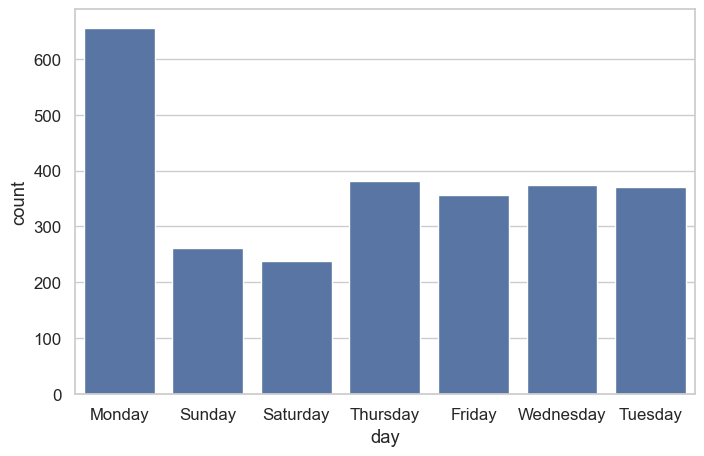

In [14]:
df_one_week = df[df['time'] >= (df['time'].max() - timedelta(days=7))].copy()
df_one_week['day'] = df_one_week['time'].dt.day_name()
sns.countplot(df_one_week, x='day')

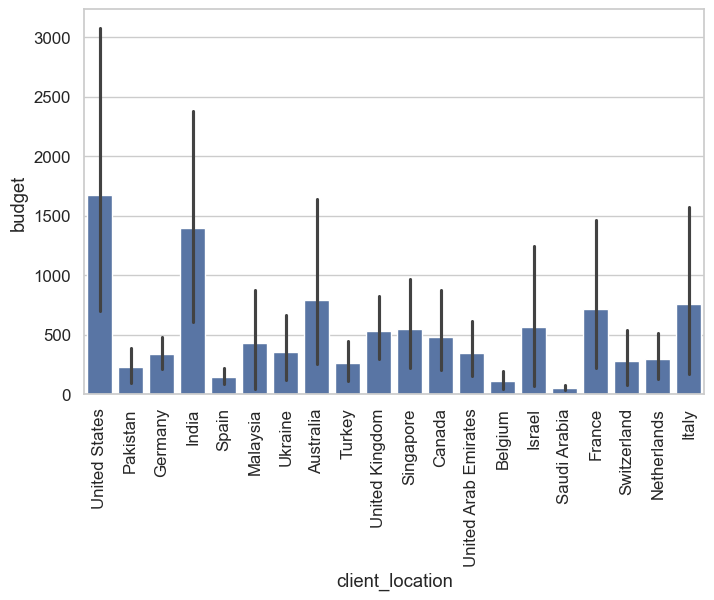

In [15]:
country_counts = df['client_location'].value_counts()
# Select the top N most common countries
n = 20  # Change this to the desired number of most common countries
top_countries = country_counts.head(n).index.tolist()
df_filtered = df[df['client_location'].isin(top_countries)]
df_filtered = df_filtered.dropna(subset=['Budget_Group'])
sns.barplot(df_filtered, x='client_location', y='budget', estimator='mean')
plt.xticks(rotation=90)
plt.show()